In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# ROC curve and AUC score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve,roc_auc_score,accuracy_score
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [2]:
X,Y = make_classification(n_samples=2000,n_classes=2,weights=[1,1],random_state=1)
trainx,testx,trainy,testy = train_test_split(X,Y,test_size=0.3,random_state=1)
print("X shape = {}, Y shape = {}\nTrain X shape = {}, Test X shape = {}\nTrain Y shape = {}, Test Y shape = {}".format(X.shape,Y.shape,trainx.shape,testx.shape,trainy.shape,testy.shape))

X shape = (2000, 20), Y shape = (2000,)
Train X shape = (1400, 20), Test X shape = (600, 20)
Train Y shape = (1400,), Test Y shape = (600,)


In [4]:
# Random Forest classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(trainx,trainy)
ytrain_pred,ytest_pred = rf_classifier.predict_proba(trainx),rf_classifier.predict_proba(testx)
print("ROC AUC score for training data = {}\nROC AUC score for testing data = {}".format(roc_auc_score(trainy,ytrain_pred[:,1]),roc_auc_score(testy,ytest_pred[:,1])))

ROC AUC score for training data = 1.0
ROC AUC score for testing data = 0.9822


In [5]:
# Logistic Regression classifier
log_classifier = LogisticRegression()
log_classifier.fit(trainx,trainy)
ytrain_pred_log,ytest_pred_log = log_classifier.predict_proba(trainx),log_classifier.predict_proba(testx)
print("ROC AUC score for training data = {}\nROC AUC score for testing data = {}".format(roc_auc_score(trainy,ytrain_pred_log[:,1]),roc_auc_score(testy,ytest_pred_log[:,1])))

ROC AUC score for training data = 0.9863568922694498
ROC AUC score for testing data = 0.9885777777777777


In [6]:
# Adaboost classifier
ada_classifier = AdaBoostClassifier()
ada_classifier.fit(trainx,trainy)
ytrain_pred_ada,ytest_pred_ada = ada_classifier.predict_proba(trainx),ada_classifier.predict_proba(testx)
print("ROC AUC score for training data = {}\nROC AUC score for testing data = {}".format(roc_auc_score(trainy,ytrain_pred_ada[:,1]),roc_auc_score(testy,ytest_pred_ada[:,1])))

ROC AUC score for training data = 0.9975081174960356
ROC AUC score for testing data = 0.9826111111111111


In [8]:
#KNN classifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(trainx,trainy)
ytrain_pred_knn,ytest_pred_knn = knn_classifier.predict_proba(trainx),knn_classifier.predict_proba(testx)
print("ROC AUC score for training data = {}\nROC AUC score for testing data = {}".format(roc_auc_score(trainy,ytrain_pred_knn[:,1]),roc_auc_score(testy,ytest_pred_knn[:,1])))

ROC AUC score for training data = 0.981670071491109
ROC AUC score for testing data = 0.9426111111111111


In [17]:
# Selecting the best threshold for maximum accuracy
pred = []
for model in [rf_classifier,log_classifier,ada_classifier,knn_classifier]:
  pred.append(pd.Series(model.predict_proba(testx)[:,1]))
# Concatenate the prediction results for all 3 classifiers column-wise in a dataframe and for all samples, calculate the mean predict_proba
print(pd.concat(pred,axis=1))
final_prediction = pd.concat(pred,axis=1).mean(axis=1)
print(final_prediction)
print("\nEnsemble ROC AUC score for all 4 classifiers together = {}".format(roc_auc_score(testy,final_prediction)))
# Calculating thresholds
fpr,tpr,thresholds = roc_curve(testy,final_prediction)

        0         1         2    3
0    0.97  0.991861  0.559186  1.0
1    0.00  0.000008  0.463282  0.0
2    0.96  0.966929  0.538202  0.8
3    0.93  0.761539  0.509875  0.8
4    0.58  0.779443  0.490344  0.4
..    ...       ...       ...  ...
595  0.01  0.024239  0.461121  0.0
596  0.01  0.000003  0.441377  0.0
597  1.00  0.984385  0.532403  1.0
598  0.02  0.001147  0.441720  0.2
599  0.99  0.989540  0.559890  0.8

[600 rows x 4 columns]
0      0.880262
1      0.115823
2      0.816283
3      0.750353
4      0.562447
         ...   
595    0.123840
596    0.112845
597    0.879197
598    0.165717
599    0.834857
Length: 600, dtype: float64

Ensemble ROC AUC score for all 4 classifiers together = 0.9848


In [19]:
accuracy_list = []
for thres in thresholds:
  y_pred = np.where(final_prediction > thres,1,0)
  accuracy_list.append(accuracy_score(testy,y_pred,normalize=True))
accuracy_list = pd.concat([pd.Series(thresholds), pd.Series(accuracy_list)],
                        axis=1)
accuracy_list.columns = ['Thresholds', 'Accuracy Scores']
accuracy_list.sort_values(by='Accuracy Scores', ascending=False, inplace=True)
accuracy_list.head()

,Thresholds,Accuracy Scores
31,0.439728,0.961667
32,0.437103,0.960000
30,0.454506,0.960000
23,0.552196,0.958333
29,0.496169,0.958333


In [20]:
# Therefore, the ideal threshold is 0.439728

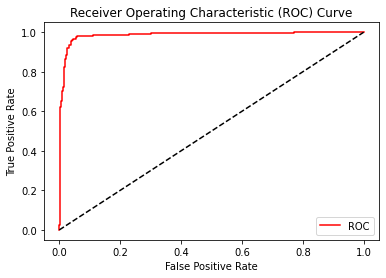

In [21]:
# Plotting the ROC curve
plt.plot(fpr, tpr, color='red', label='ROC')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()